# Function for Row Reduced Echelon Form

## Acknowledegment
1. Machine Learning Class Notes, Dr.Rakesh Nigam
2. Title:Coding the Matrix: Linear Algebra Through Applications to Computer Science\
Author:	Philip N. Klein
Publisher:Newtonian Press, 2013
3. MIT OpenCourseWare, Linear Algebra 18.06
3. Have discussed the problem statement and concepts with my classmates Vamsi, Savithri, Himani and Palak.

In [1]:
# code for rref
import numpy as np 
# define the function
def my_echelon(A):
# assignment operation
    index_list = []

# IDENTIFY PIVOTS BY ITERATING OVER COLUMNS AND OVER ROWS IN EACH COLUMN
    
    for j in range(A.shape[1]): # iterate over columns 
        for i in range(A.shape[0]): # iterate over the rows in column j
            if i not in index_list and A[i, j] != 0: #--->if condiction evaluates to true then proceed

# we do 3 things - add row index to index list, make the pivot 1, make other elements of that column 0
                index_list.append(i) # ---> add row index to index list
                A[i,:] = A[i,:]/A[i,j] #--->  make the pivot 1
# we write a for loop to make other elements of that column 0
                for k in range(A.shape[0]):
                    if k!= i and A[k,j]!=0:
                        A[k,:] = A[k,:]-(A[k,j]*A[i,:])
# row swap using index
    for q in index_list:
        A[[index_list.index(q) , q]] = A[[q,index_list.index(q)]]
# return RREF
    print(A)   

In [2]:
# example
A = np.array([[3.,6, 5],[6, 14, 11]])

In [3]:
#output of example
my_echelon(A)

[[1.         0.         0.66666667]
 [0.         1.         0.5       ]]


# Regression (Simple Example)
In ABC Shopping Centre, we wish to find the relation between the sales revenue and amount spent on advertisements. We assume a linear relationship. $ Y = C + Dx + error$ where $Y$ is the sales and $X$ is the amount spent on ads. The regression problem is to find $C$ and $D$ such that $ Y = C + Dx$ is the best fit line that minimizes the error. We have observed the following data from 3 years. In year 1, we spent $1$ unit on ads and sales revenue was $1$ unit; in year 2, we spent $2$ units on ads and sales revenue was $2$ units; in year 3 we spent $3$ units on ads and sales revenue was $2$ units. 

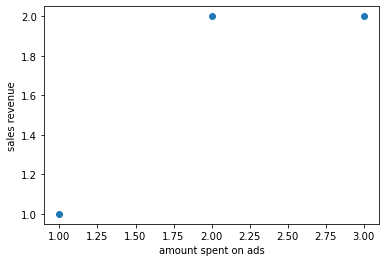

In [51]:
# plot the points
import matplotlib.pyplot as plt
x = (1, 2, 3)
y = (1, 2, 2)
plt.scatter(x,y)
plt.xlabel('amount spent on ads')
plt.ylabel('sales revenue')
plt.show()

# Solution Using Linear Algebra(Theory)
We want to solve the equations
$$ C + D = 1 $$
$$ C + 2D = 2 $$
$$ C + 3D = 2$$
In matrix notation, we write
$\begin{bmatrix}
  1 & 1\\
  1 & 2\\
  1 & 3\\
\end{bmatrix}
\begin{bmatrix}
    C\\
    D\\
\end{bmatrix} =
\begin{bmatrix}
    1\\
    2\\
    2
\end{bmatrix}$
Clearly, this system has no solution. 
We solve the normal equations
$$ A^TA\hat x = A^Tb $$
$A^TA$ is
$$\begin{bmatrix}
    1 & 1 & 1\\
    1 & 2 & 3\\ 
    \end{bmatrix}
    \begin{bmatrix}
    1 & 1\\
    1 & 2\\
    1 & 3
    \end{bmatrix} = 
    \begin{bmatrix}
    3 & 6\\
    6 & 14
    \end{bmatrix}
 $$
 and $A^Tb$ is
 $$ \begin{bmatrix}
 1 & 1 & 1\\
 1 & 2 & 3\\
 \end{bmatrix}\begin{bmatrix}
 1\\
 2\\
 2\\
 \end{bmatrix}=\begin{bmatrix}
 5\\
 11
 \end{bmatrix}
 $$
 We write the augmented matrix
 $$ \begin{bmatrix}
  3 & 6 & 5\\
  6 & 14 & 11
\end{bmatrix}$$
Using ERO $R_2 \to R_2 - 2R_1$, we get
$$\begin{bmatrix}
  3 & 6 & 5\\
  0 & 2 & 1
\end{bmatrix} $$
Using ERO, $R_2 \to \frac{1}{2} R_2$, we get
$$ \begin{bmatrix}
  3 & 6 & 5\\
  0 & 1 & 1/2
\end{bmatrix} $$
Solving we get $ C = 2/3$ and $D=1/2$.

# Solution using code for rref

In [52]:
# use rref code to solve 
A = np.array([[3.,6, 5],[6, 14, 11]]) # this is augmented matrix
my_echelon(A) # we have the same solution C = 2/3 and D = 1/2

[[1.         0.         0.66666667]
 [0.         1.         0.5       ]]


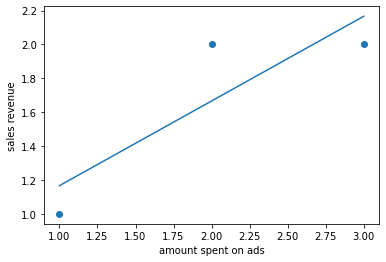

In [53]:
# plot the best fit line
x = np.array(x)
y_hat = (0.66666667)+(0.5)*x
plt.plot(x, y_hat)
plt.scatter(x,y)
plt.xlabel('amount spent on ads')
plt.ylabel('sales revenue')
plt.show()

# Example when this method fails

In another store, the sales revenue $z$ is related to amount spent on ads $x$ and bonus given to sales staff $y$ by the equation $z = Cx + Dy $. We have observed the following data for the last three years. \
Year 1: $x = 1$, $y = 2$, $z = 7$\
Year 2: $x =2$, $y = 4$, $z = 10$\
Year 3: $x = 3$, $y=6$, $z= 16$\
We can write the equations as:\
$ 1C + 2D = 7$\
$2C + 4D = 10$\
$3C + 6D = 16$\
In matrix notation:
$\begin{bmatrix}
1 & 2\\
2 & 4\\
3 & 6\\
\end{bmatrix} \begin{bmatrix}
C\\
D\\
\end{bmatrix}=
\begin{bmatrix}
7\\
10\\
16\\
\end{bmatrix}
$

In [55]:
P = np.array([[1,2],[2,4],[3,6]])
print(P)

[[1 2]
 [2 4]
 [3 6]]


In [57]:
P_transpose = P.transpose()
print(P.transpose())

[[1 2 3]
 [2 4 6]]


In [58]:
z = np.array([7,10,16])

In [59]:
z = z.transpose()

In [61]:
# (P_transpose)(P)
Q = np.matmul(P_transpose,P)
print(Q)

[[14 28]
 [28 56]]


In [72]:
# (P_transpose)(z)
R = np.matmul(P_transpose, z).reshape(2,1)
print(R)

[[ 75]
 [150]]


In [74]:
augmented_matrix = np.hstack((Q, R))
print(augmented_matrix)

[[ 14  28  75]
 [ 28  56 150]]


In [75]:
my_echelon(augmented_matrix) # inconsistency!!!thus the method breaks down!!!!

[[1 2 0]
 [0 0 1]]


# 'Complicated' Example

In QWERTY store, the target variable $z = sales$ is related to the feature vector $(x=\text{amount spent on ads}, y=\text{sales bonus})$ by the equation $ z = Cx^2 + Dy + E $. We have $10$ data points.

In [162]:
# "cooking up" the data
np.random.seed(0) # seed will give same result to numpy function each time
x = np.random.randint(100, size=(10))
y = np.random.randint(100, size=(10))
z = 7*(x)**2 + 5*(y) + 1 + (0.1)*np.random.randn(10) # randn returns numbers using standard normal
z_hat = 7*(x)**2 + 5*(y) + 1
A = np.vstack(((x**2),y,np.ones(10)))
A = A.transpose()
print(A)

[[1.936e+03 7.000e+01 1.000e+00]
 [2.209e+03 8.800e+01 1.000e+00]
 [4.096e+03 8.800e+01 1.000e+00]
 [4.489e+03 1.200e+01 1.000e+00]
 [4.489e+03 5.800e+01 1.000e+00]
 [8.100e+01 6.500e+01 1.000e+00]
 [6.889e+03 3.900e+01 1.000e+00]
 [4.410e+02 8.700e+01 1.000e+00]
 [1.296e+03 4.600e+01 1.000e+00]
 [7.569e+03 8.800e+01 1.000e+00]]


In [163]:
A_transpose = A.transpose() # matrix multiplication of A transpose and A
B = np.matmul(A_transpose,A)
print(B)

[[1.72335975e+08 2.04258100e+06 3.34950000e+04]
 [2.04258100e+06 4.70710000e+04 6.41000000e+02]
 [3.34950000e+04 6.41000000e+02 1.00000000e+01]]


In [164]:
z = z.transpose()
z

array([13903.11253141, 15903.96410044, 29113.12206081, 31483.86605045,
       31714.04283734,   892.98765369, 48419.14143772,  3522.98759493,
        9303.20081571, 53424.02298865])

In [165]:
C = np.matmul(A_transpose, z)
print(C)

[1.21659986e+09 1.45340942e+07 2.37680448e+05]


In [166]:
C = C.reshape(3,1)
C

array([[1.21659986e+09],
       [1.45340942e+07],
       [2.37680448e+05]])

In [167]:
augmented_mat = np.hstack((B, C))

In [168]:
my_echelon(augmented_mat)

[[1.         0.         0.         7.000003  ]
 [0.         1.         0.         5.00047182]
 [0.         0.         1.         1.0045313 ]]


Solving we get , $E = 1.0045313 $, $D =5.00047182$ and $C = 7.000003$